In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib 

### Data Exploration

In [11]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [12]:
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [13]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [14]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [15]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [17]:
# Check for NaN values for columns
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

### Visualize data

C:\Users\PicardiC\AppData\Local\Temp\ipykernel_25184\1826636702.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


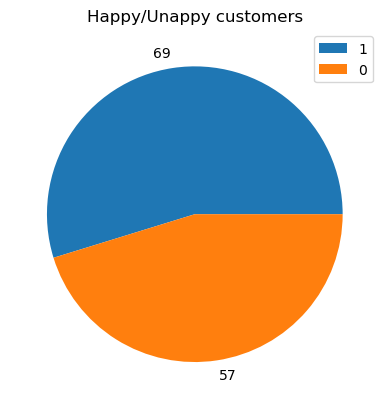

In [23]:
fig, ax = plt.subplots()
happy_counts = df['Y'].value_counts()
ax.pie(happy_counts, labels=happy_counts)
ax.set_title('Happy/Unappy customers')
ax.legend(happy_counts.keys().tolist())
fig.show()

In [25]:
df_happy = df[df.Y==1]
df_happy.shape

(69, 7)

In [26]:
df_nothappy = df[df.Y==0]
df_nothappy.shape

(57, 7)

In [53]:
def show_plot_features(happy_counts_f, not_happy_counts_f, title):
    fig, ax = plt.subplots(1, 2, figsize = (15,8))
    ax[0].pie(happy_counts_f, labels=happy_counts_f)
    ax[0].set_title('Happy customer')
    ax[0].legend(happy_counts_f.keys().tolist())
    ax[1].pie(not_happy_counts_f, labels=not_happy_counts_f)
    ax[1].set_title('Not happy customer')
    ax[1].legend(not_happy_counts_f.keys().tolist())
    fig.suptitle(title)
    # Display the plot
    plt.show()

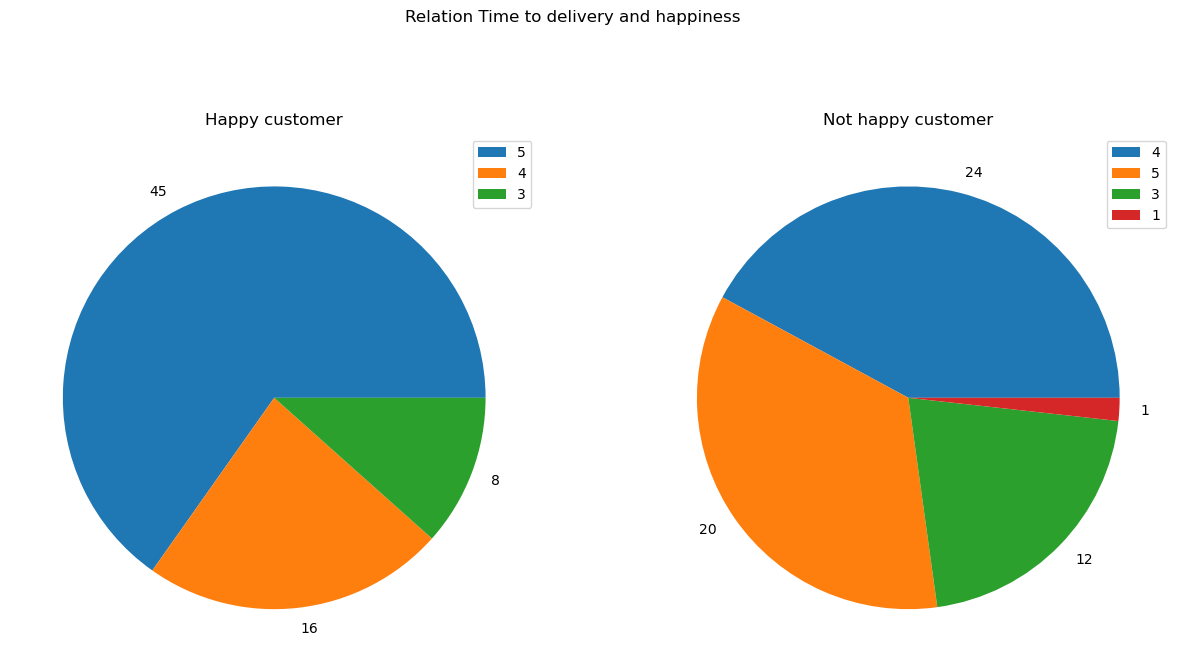

In [54]:
happy_counts_X1 = df_happy['X1'].value_counts()
not_happy_counts_X1 = df_nothappy['X1'].value_counts()
show_plot_features(happy_counts_X1, not_happy_counts_X1, 'Relation Time to delivery and happiness')

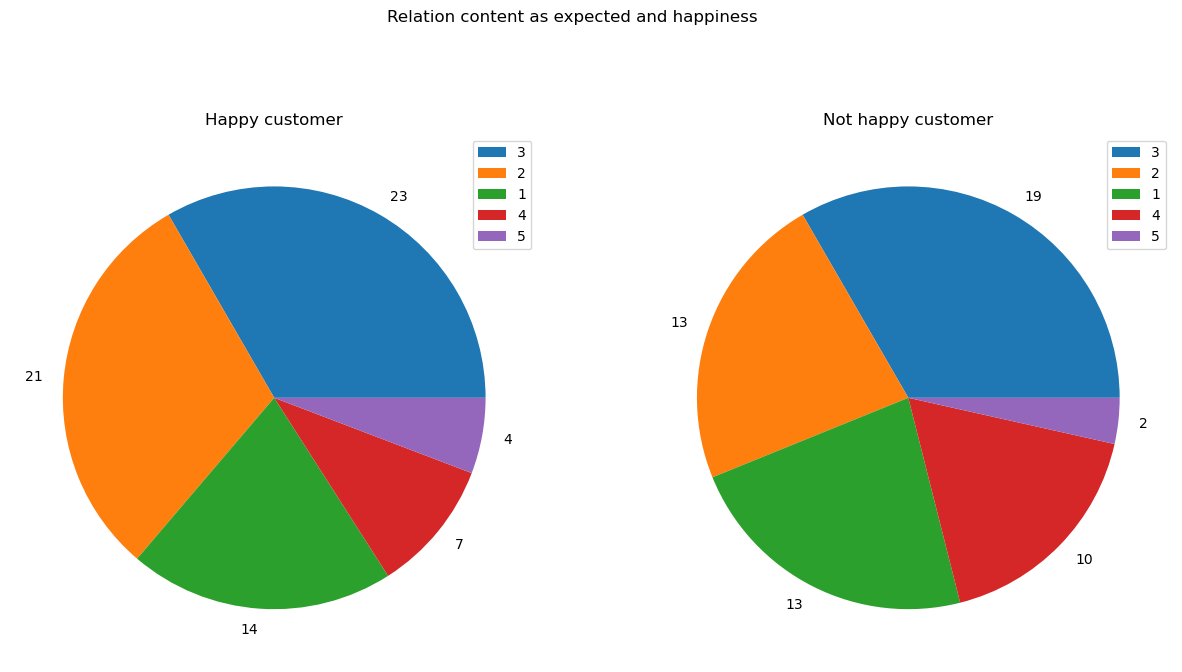

In [55]:
happy_counts_X2 = df_happy['X2'].value_counts()
not_happy_counts_X2 = df_nothappy['X2'].value_counts()
show_plot_features(happy_counts_X2, not_happy_counts_X2, 'Relation content as expected and happiness')

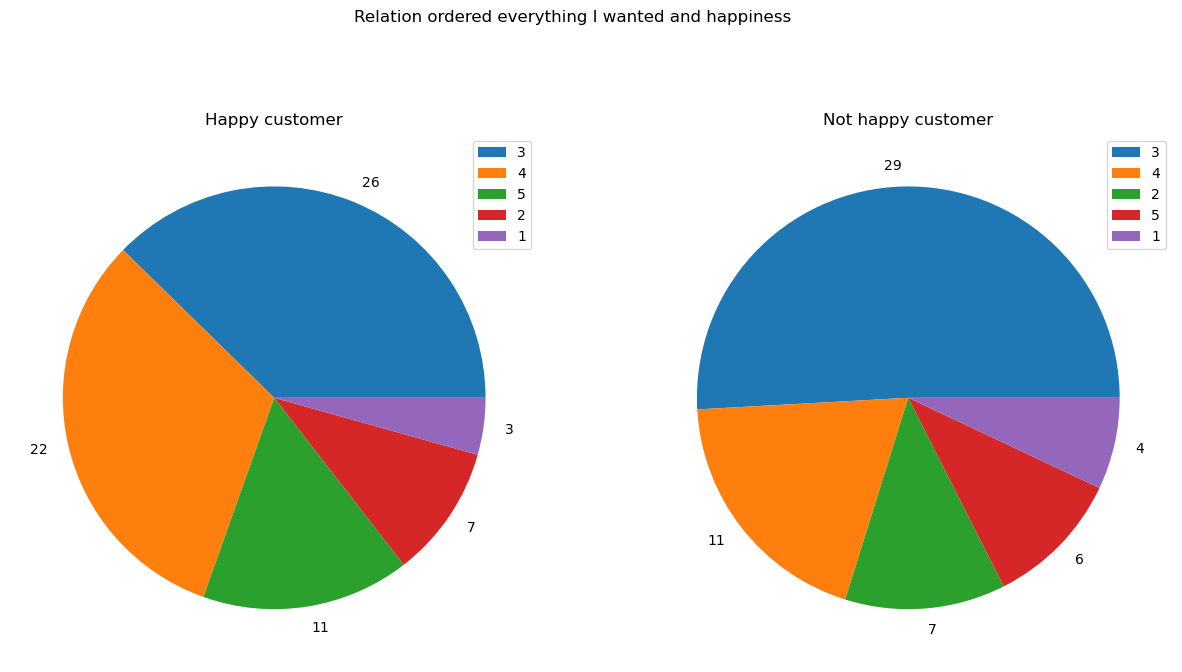

In [56]:
happy_counts_X3 = df_happy['X3'].value_counts()
not_happy_counts_X3 = df_nothappy['X3'].value_counts()
show_plot_features(happy_counts_X3, not_happy_counts_X3, 'Relation ordered everything I wanted and happiness')

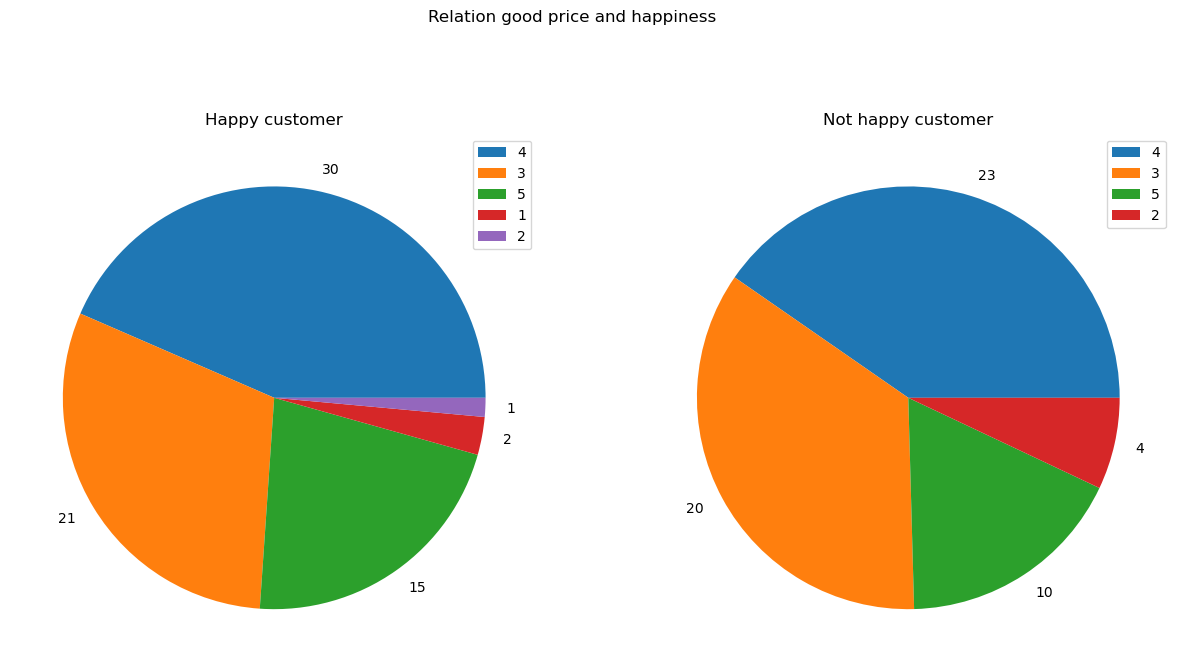

In [57]:
happy_counts_X4 = df_happy['X4'].value_counts()
not_happy_counts_X4 = df_nothappy['X4'].value_counts()
show_plot_features(happy_counts_X4, not_happy_counts_X4, 'Relation good price and happiness')

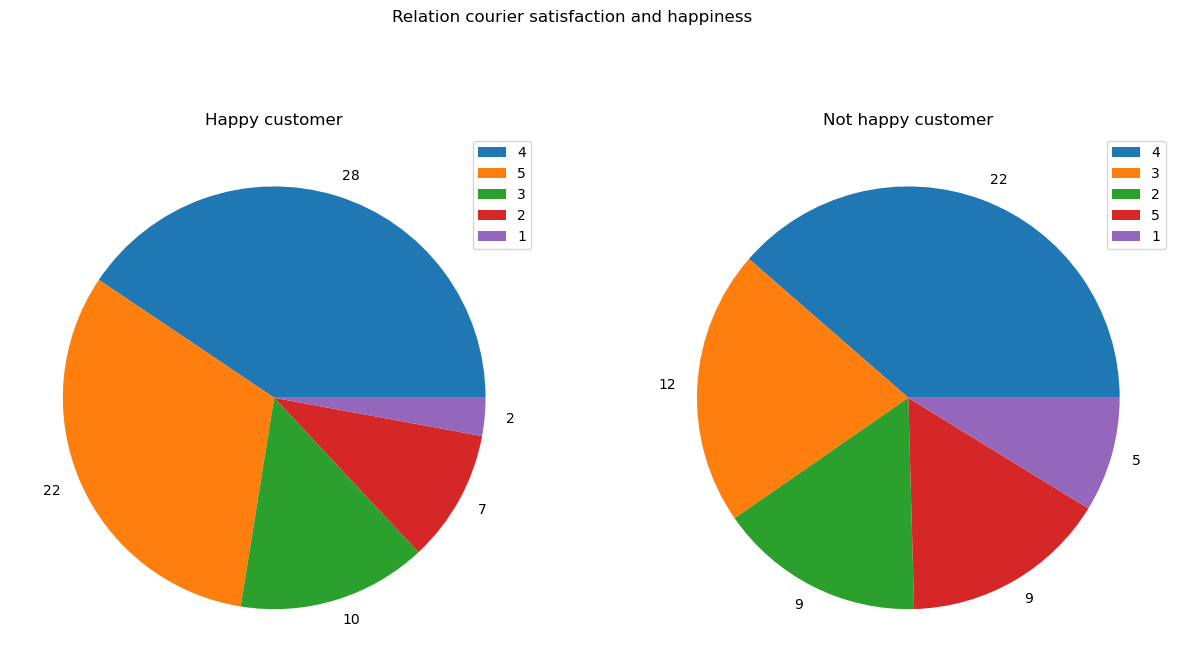

In [58]:
happy_counts_X5 = df_happy['X5'].value_counts()
not_happy_counts_X5 = df_nothappy['X5'].value_counts()
show_plot_features(happy_counts_X5, not_happy_counts_X5, 'Relation courier satisfaction and happiness')

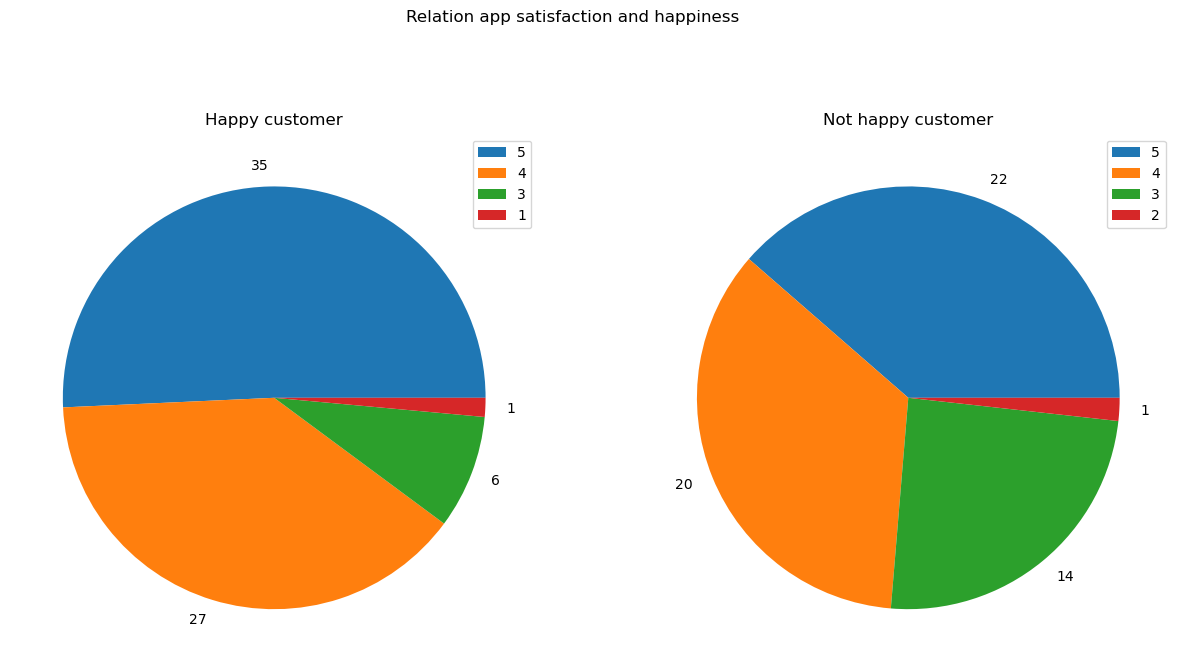

In [59]:
happy_counts_X6 = df_happy['X6'].value_counts()
not_happy_counts_X6 = df_nothappy['X6'].value_counts()
show_plot_features(happy_counts_X6, not_happy_counts_X6, 'Relation app satisfaction and happiness')

### Prepare dataset

In [7]:
y = df['Y']
X = df.iloc[:,1:7]
print(X.shape, y.shape)

(126, 6) (126,)


### Training different models

In [10]:
# Instnatiating the models 
logistic_regression = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
rf =  RandomForestClassifier(max_depth=2, random_state=0)

# Training the models 
logistic_regression.fit(X, y)
svm.fit(X, y)
tree.fit(X, y)
rf.fit(X, y)

# Making predictions with each model
log_reg_preds = logistic_regression.predict(X)
svm_preds = svm.predict(X)
tree_preds = tree.predict(X)
rf_preds = rf.predict(X)

In [11]:
model_preds = {
    "Logistic Regression": log_reg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Random forest": rf_preds
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y, preds)}", sep="\n\n")


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48        57
           1       0.60      0.71      0.65        69

    accuracy                           0.58       126
   macro avg       0.57      0.57      0.56       126
weighted avg       0.57      0.58      0.57       126

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        57
           1       0.72      0.84      0.78        69

    accuracy                           0.74       126
   macro avg       0.74      0.73      0.73       126
weighted avg       0.74      0.74      0.73       126

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.97      0.93      0.95        69

    accuracy                           0.94       126
   macro avg       0.94      0.95      0.94 

From the result it is clear that the best model is the Decision Tree reaching 94% accuracy on the training data provided

In [16]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)               

[0.18058472 0.18640579 0.19300417 0.16093765 0.1516694  0.12739828]
(126, 3)


C:\Users\PicardiC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
tree = DecisionTreeClassifier()
